In [ ]:
"""
- 계절요인 분리. Trend, Seasonl, residual을 포함하는 테이블 생성. 
- Insight 도출
  1. 월평균 성장율 
  2. Seasonal 요소 분석
  3. residual 증감 여부 
  """

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<AxesSubplot:xlabel='date'>

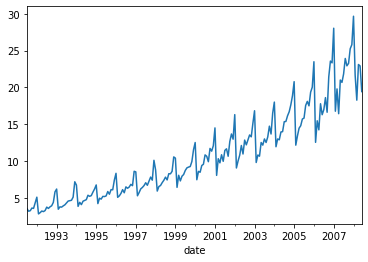

In [4]:
df.value.plot()

In [5]:
df=df[df.index>'1999-12-31']

In [6]:
result= seasonal_decompose(df, model='additive', two_sided=False)

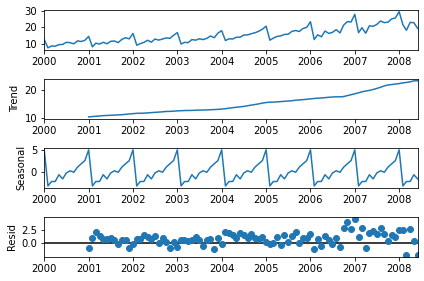

In [7]:
result.plot()
plt.show()

In [8]:
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)

In [9]:
df_re.columns=['obs', 'trend', 'seasonal', 'resid']
df_re.dropna(inplace=True)

In [10]:
df_re.head(24)
df_re['year']=df_re.index.year

In [11]:
df_re.head()

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


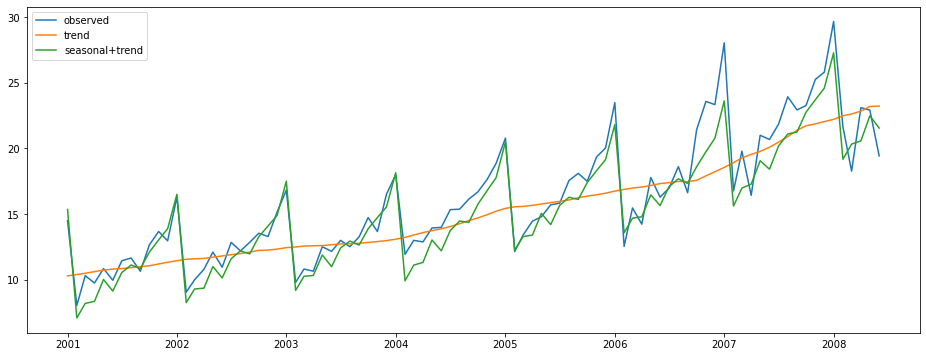

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()
# 2006년 2007년에는 ordinary한 cycle에서 벗어나는 경향이 있다. (residual 크다. )

In [14]:
df_re.index[0]
def get_date(date):
  return (str(date.year)+'-'+str(date.month))

In [15]:
get_date(df_re.index[0])

'2001-1'

ValueError: The number of FixedLocator locations (89), usually from a call to set_ticks, does not match the number of ticklabels (90).

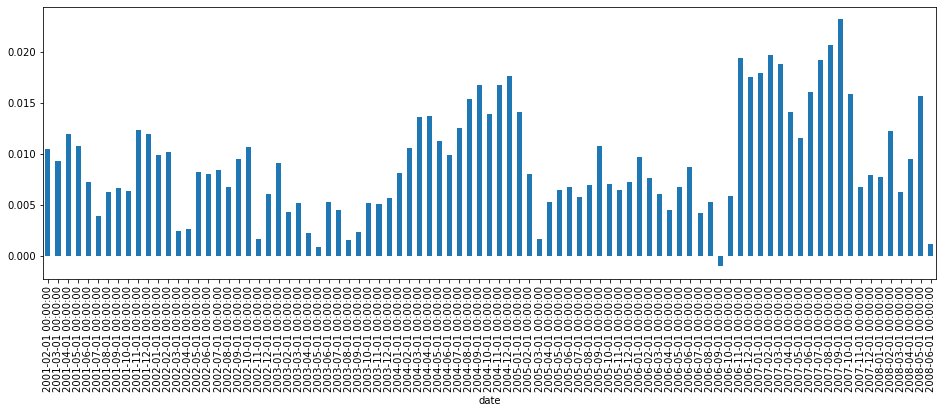

In [19]:
# trend
ax=df_re.trend.pct_change().dropna().plot(kind='bar', figsize=(16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index  )))

<AxesSubplot:xlabel='year'>

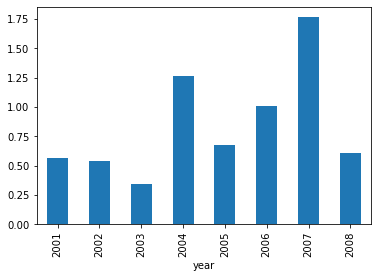

In [20]:
# residual : unexpected 값들이다.
df_re.groupby('year')['resid'].mean().plot(kind='bar')